Importing libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from pyvis.network import Network
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'graph_tool', 'wurlitzer', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


Load Relationship Data

In [2]:
file_path = "C:/Users/henry/OneDrive/20th-century/country_relationships.csv"
rel_df = pd.read_csv(file_path)
rel_df.head()

,source,target,value
0,France,Russia,11
1,Germany,Russia,24
2,Germany,Italy,25
3,Austria,Germany,11
4,Germany,Spain,1


In [3]:
# Create graph object from dataframe
G = nx.from_pandas_edgelist(rel_df, source="source", target="target", edge_attr="value", create_using=nx.Graph())

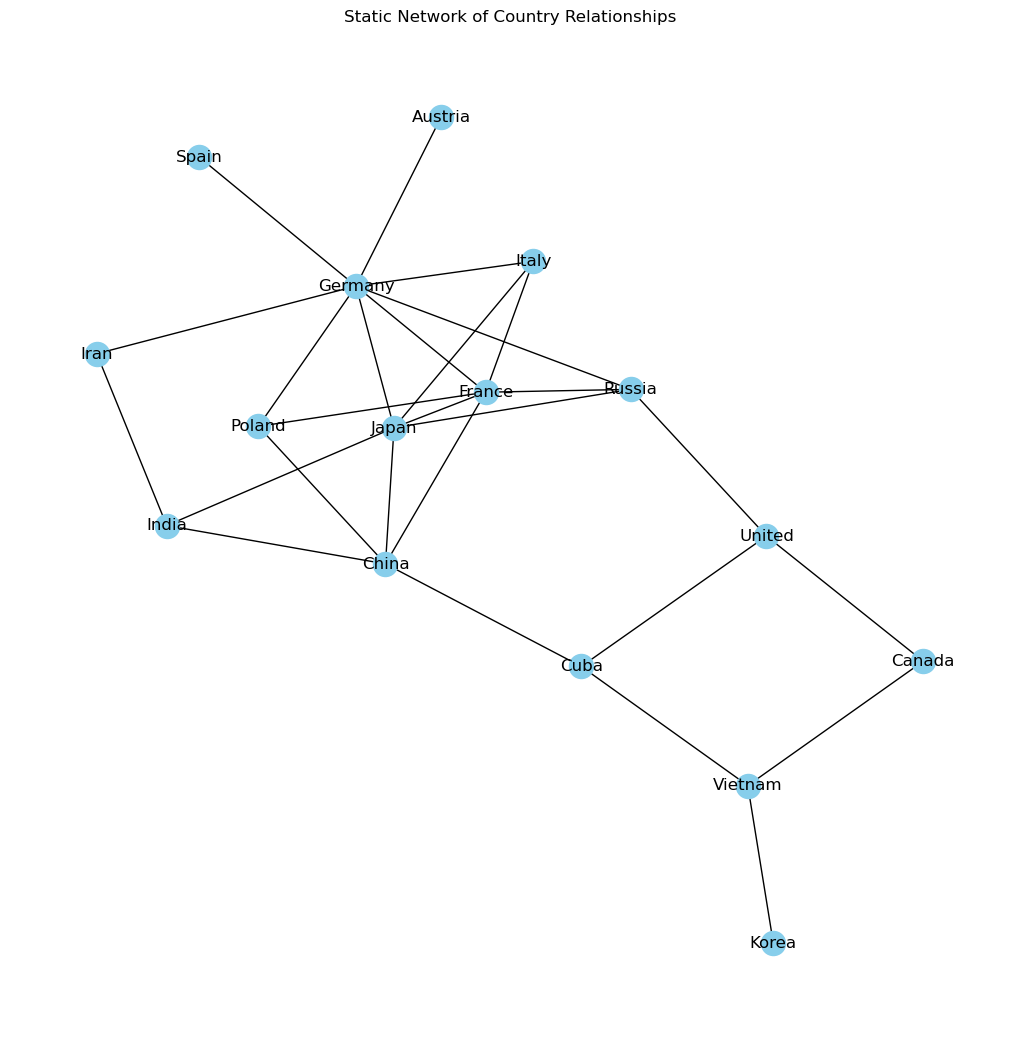

In [4]:
# Static Network Graph with NetworkX
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.title("Static Network of Country Relationships")
plt.show()

In [5]:
# Interactive Network Graph with Pyvis
net = Network(notebook=True, width="1000px", height="800px", bgcolor="#222222", font_color="white")
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_=True)
net.repulsion()
net.show("C:/Users/henry/OneDrive/20th-century/countries_network.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [6]:
# Importing leidenalg
import leidenalg
import igraph

In [7]:
# Community Detection with Leiden Algorithm
coms = algorithms.leiden(G)
new_com = coms.to_node_community_map()
dict_com = {k: v[0] for k, v in new_com.items()}
nx.set_node_attributes(G, dict_com, 'group')

In [8]:
# Visualize Communities
com_net = Network(notebook=True, width="1300px", height="700px", bgcolor="#222222", font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_=True)
com_net.repulsion()
com_net.show("C:/Users/henry/OneDrive/20th-century/countries_communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


The Leiden algorithm successfully grouped countries with historical or political associations. Some communities reflect World War alliances or Cold War blocks. This suggests clear geopolitical clustering based on interaction frequency.


 Centrality Measures

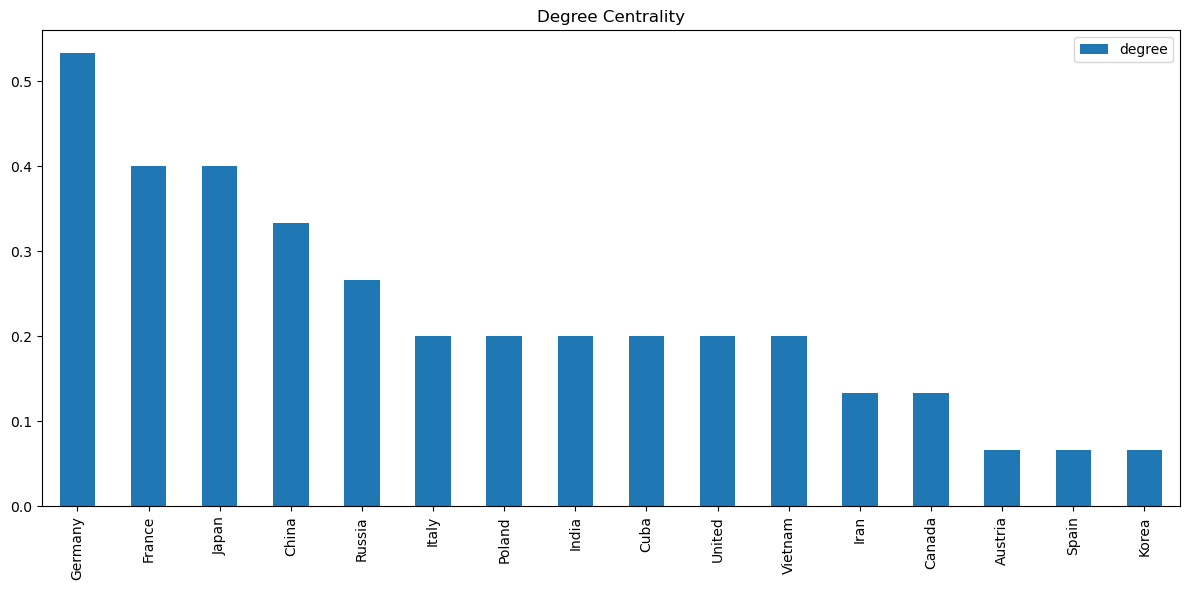

In [9]:
# Degree Centrality
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['degree']).sort_values(by='degree', ascending=False)
degree_df.plot(kind='bar', figsize=(12,6), title='Degree Centrality')
plt.tight_layout()
plt.show()

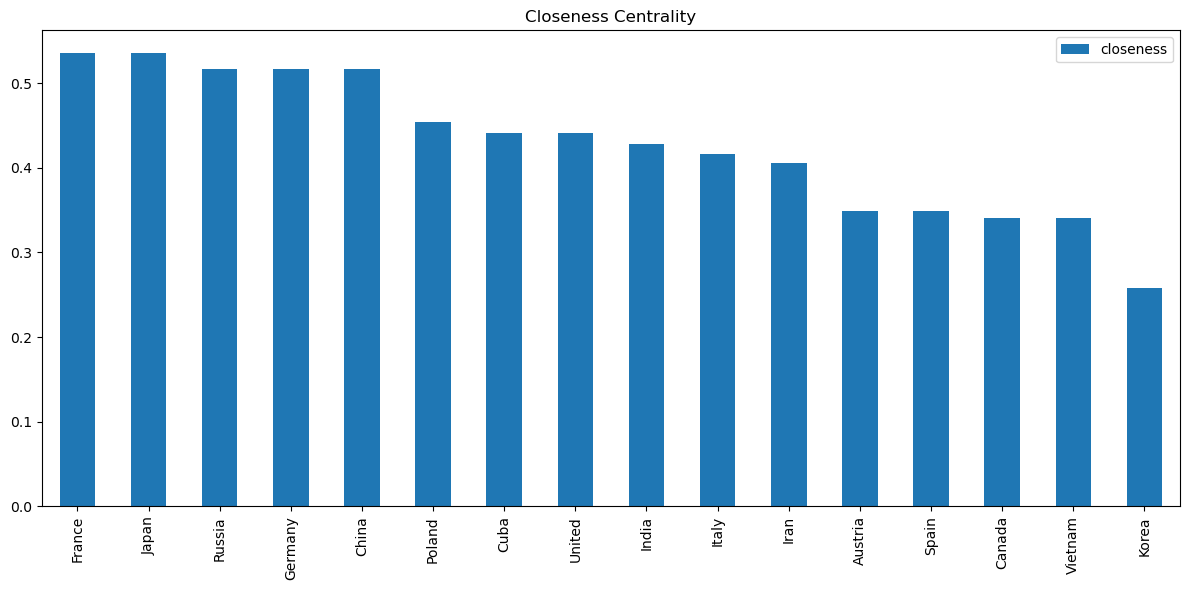

In [10]:
# Closeness Centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['closeness']).sort_values(by='closeness', ascending=False)
closeness_df.plot(kind='bar', figsize=(12,6), title='Closeness Centrality')
plt.tight_layout()
plt.show()

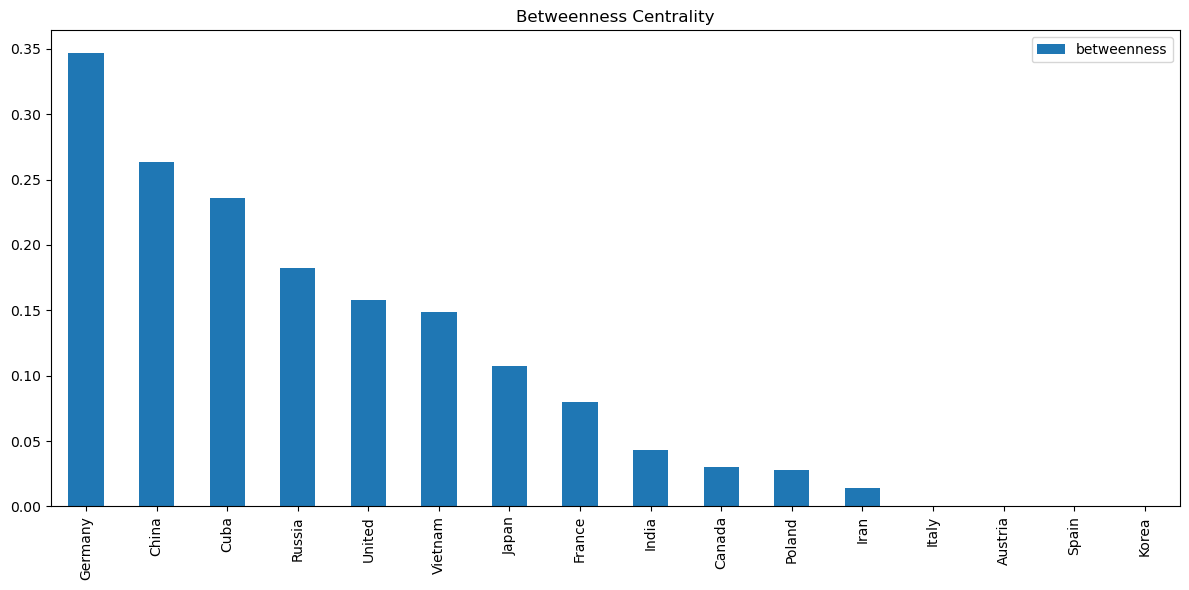

In [11]:
# Betweenness Centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['betweenness']).sort_values(by='betweenness', ascending=False)
betweenness_df.plot(kind='bar', figsize=(12,6), title='Betweenness Centrality')
plt.tight_layout()
plt.show()

Countries with high degree and closeness centrality likely played influential roles across multiple historical events. High betweenness values suggest nations that acted as intermediaries or strategic mediators.